In [1]:
# might need to pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
# !pip install kaggle

C:\Users\ynakadi\Anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


#### Get S&P 500 Stocks

In [2]:
!!kaggle datasets download -d andrewmvd/sp-500-stocks --force
#!!kaggle datasets download -d williecosta/russell-3000-stock-history

['Downloading sp-500-stocks.zip to C:\\Users\\ynakadi\\Documents\\GitHub\\AlgorithmicTrading',
 '',
 '  0%|          | 0.00/42.2M [00:00<?, ?B/s]',
 '  2%|2         | 1.00M/42.2M [00:00<00:06, 6.19MB/s]',
 '  7%|7         | 3.00M/42.2M [00:00<00:03, 12.8MB/s]',
 ' 14%|#4        | 6.00M/42.2M [00:00<00:02, 16.4MB/s]',
 ' 21%|##1       | 9.00M/42.2M [00:00<00:01, 18.2MB/s]',
 ' 28%|##8       | 12.0M/42.2M [00:00<00:01, 18.6MB/s]',
 ' 36%|###5      | 15.0M/42.2M [00:00<00:01, 20.5MB/s]',
 ' 43%|####2     | 18.0M/42.2M [00:01<00:01, 21.0MB/s]',
 ' 50%|####9     | 21.0M/42.2M [00:01<00:01, 21.1MB/s]',
 ' 57%|#####6    | 24.0M/42.2M [00:01<00:00, 20.6MB/s]',
 ' 64%|######3   | 27.0M/42.2M [00:01<00:00, 20.5MB/s]',
 ' 69%|######8   | 29.0M/42.2M [00:01<00:00, 20.4MB/s]',
 ' 73%|#######3  | 31.0M/42.2M [00:01<00:00, 20.4MB/s]',
 ' 81%|########  | 34.0M/42.2M [00:01<00:00, 21.0MB/s]',
 ' 88%|########7 | 37.0M/42.2M [00:01<00:00, 21.3MB/s]',
 ' 95%|#########4| 40.0M/42.2M [00:02<00:00, 21.5MB/s]

In [3]:
import zipfile
file = 'sp-500-stocks.zip'
print('Unzipping:',file)

with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall()

Unzipping: sp-500-stocks.zip


In [4]:
# file = 'russell-3000-stock-history.zip'
# print('Unzipping:',file)

# with zipfile.ZipFile(file, 'r') as zip_ref:
#     zip_ref.extractall()

In [4]:
sp500_df = pd.read_csv('sp500_companies.csv')
sp500_df.head(5)

Exchange Symbol              Shortname               Longname  \
0      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
1      NMS   AAPL             Apple Inc.             Apple Inc.   
2      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   
3      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
4      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   

                   Sector                        Industry  Currentprice  \
0              Technology       Software - Infrastructure        406.32   
1              Technology            Consumer Electronics        185.04   
2  Communication Services  Internet Content & Information        146.37   
3  Communication Services  Internet Content & Information        145.14   
4              Technology                  Semiconductors        721.28   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3019136303104  1.184270e+11          0.176        Redmond    WA   
1  2857369075712  1.301090e+11          0.021      Cupertino    CA   
2  1811972751360  1.001720e+11          0.135  Mountain View    CA   
3  1811100467200  1.001720e+11          0.135  Mountain View    CA   
4  1781561819136  2.216100e+10          2.055    Santa Clara    CA   

         Country  Fulltimeemployees  \
0  United States           221000.0   
1  United States           161000.0   
2  United States           182502.0   
3  United States           182502.0   
4  United States            26196.0   

                                 Longbusinesssummary    Weight  
0  Microsoft Corporation develops and supports so...  0.065596  
1  Apple Inc. designs, manufactures, and markets ...  0.062081  
2  Alphabet Inc. offers various products and plat...  0.039368  
3  Alphabet Inc. offers various products and plat...  0.039349  
4  NVIDIA Corporation provides graphics, and comp...  0.038707

In [5]:
# russell3000_df = pd.read_csv('prices.csv')
# russell3000_df.head(5)

In [6]:
#stocks_list = list(set(list(set(russell3000_df['symbol'])) + list(set(sp500_df['Symbol']))))
stocks_list = list(set(sp500_df['Symbol'])) 

In [308]:
start_date = "2016-01-01"
end_date = "2024-03-01"
stocks_df = pd.DataFrame()
random.shuffle(stocks_list)
for stock in stocks_list[:225]:
    df = yf.download(stock, start = start_date, end = end_date)
    df['company'] = stock
    stocks_df = pd.concat([stocks_df,df])
    
# Alternatively, you can do yf.download([stocks], start = start_date, end = end_date),
# but that leads to multi-index columns

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [316]:
stocks_df

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2016-01-04  74.690002  75.570000  74.500000  75.279999  64.761795  6534600   
2016-01-05  75.440002  76.470001  74.910004  75.440002  64.899452  5198800   
2016-01-06  74.510002  74.750000  73.400002  73.940002  63.609013  5326500   
2016-01-07  72.839996  73.879997  71.750000  72.070000  62.000294  6401600   
2016-01-08  72.669998  72.800003  70.680000  70.879997  60.976555  5325500   
...               ...        ...        ...        ...        ...      ...   
2024-02-08  20.129999  20.360001  19.690001  20.020000  20.020000  7305800   
2024-02-09  19.990000  20.110001  19.650000  20.080000  20.080000  6460900   
2024-02-12  20.190001  20.250000  19.670000  19.809999  19.809999  5283400   
2024-02-13  19.340000  19.540001  19.059999  19.500000  19.500000  6788000   
2024-02-14  19.559999  19.635000  19.330000  19.504999  19.504999  3272511   

           company  
Date                
2016-01-04     LOW  
2016-01-05     LOW  
2016-01-06     LOW  
2016-01-07     LOW  
2016-01-08     LOW  
...            ...  
2024-02-08     KIM  
2024-02-09     KIM  
2024-02-12     KIM  
2024-02-13     KIM  
2024-02-14     KIM  

[457341 rows x 7 columns]

In [246]:
stocks_df.describe()

Open         High          Low        Close    Adj Close  \
count  7056.000000  7056.000000  7056.000000  7056.000000  7056.000000   
mean    204.464997   206.809638   202.112309   204.542549   202.063729   
std     132.290074   133.448894   131.050176   132.331930   130.666542   
min      33.509998    33.840000    33.294998    33.529999    30.488960   
25%     101.500000   102.985874   100.627501   101.842251   101.842251   
50%     166.137749   167.922997   164.449257   166.138504   165.442001   
75%     289.419991   292.660828   285.008331   289.292511   286.322853   
max     745.820007   764.049988   745.330017   753.711792   753.711792   

             Volume  
count  7.056000e+03  
mean   4.395420e+07  
std    4.272929e+07  
min    8.150000e+05  
25%    4.187500e+06  
50%    3.095030e+07  
75%    7.049895e+07  
max    3.065906e+08

In [329]:
close_price_df = stocks_df.loc[:,['Close','company']].reset_index()
close_price_df

Date      Close company
0      2016-01-04  75.279999     LOW
1      2016-01-05  75.440002     LOW
2      2016-01-06  73.940002     LOW
3      2016-01-07  72.070000     LOW
4      2016-01-08  70.879997     LOW
...           ...        ...     ...
457336 2024-02-08  20.020000     KIM
457337 2024-02-09  20.080000     KIM
457338 2024-02-12  19.809999     KIM
457339 2024-02-13  19.500000     KIM
457340 2024-02-14  19.504999     KIM

[457341 rows x 3 columns]

KeyboardInterrupt: 

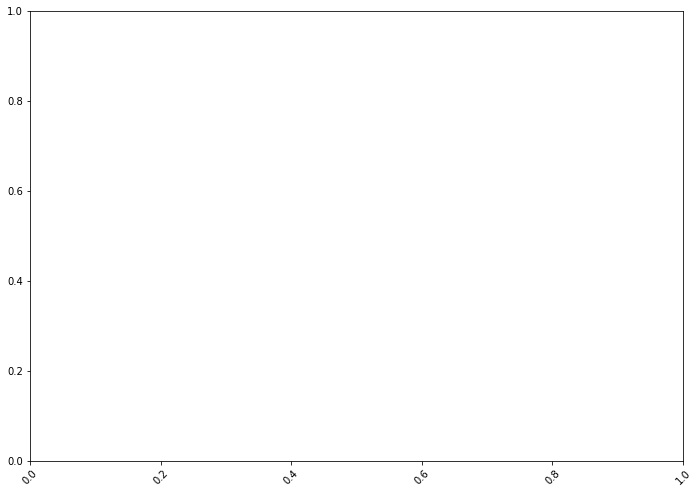

In [318]:
plt.xticks(rotation=45)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_df,x='Date',y='Close',color='company').update_layout(
    xaxis_title="Date", yaxis_title="Close Price ($)"
)

### Aggregate for Industry + Sector

In [248]:
industry_df = stocks_df.reset_index().merge(sp500_df[['Symbol','Sector','Industry']],left_on='company',right_on='Symbol').set_index('Date')
industry_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04   37.650002   37.950001   36.820000   37.130001   34.561192   
2021-01-05   37.279999   38.009998   37.180000   37.750000   35.138302   
2021-01-06   38.619999   40.660000   38.619999   40.209999   37.428104   
2021-01-07   40.779999   41.040001   40.349998   40.889999   38.061058   
2021-01-08   41.000000   41.119999   40.009998   40.619999   37.809738   
...                ...         ...         ...         ...         ...   
2024-02-08  728.320007  741.000000  725.750000  735.679993  735.679993   
2024-02-09  735.500000  745.700012  733.609985  740.159973  740.159973   
2024-02-12  740.799988  740.799988  726.450012  737.260010  737.260010   
2024-02-13  730.179993  742.979980  730.179993  742.969971  742.969971   
2024-02-14  745.820007  764.049988  745.330017  753.711792  753.711792   

             Volume company Symbol              Sector  \
Date                                                     
2021-01-04  7081000     AIG    AIG  Financial Services   
2021-01-05  4268000     AIG    AIG  Financial Services   
2021-01-06  8198600     AIG    AIG  Financial Services   
2021-01-07  5109700     AIG    AIG  Financial Services   
2021-01-08  5344800     AIG    AIG  Financial Services   
...             ...     ...    ...                 ...   
2024-02-08  4636900     LLY    LLY          Healthcare   
2024-02-09  2830700     LLY    LLY          Healthcare   
2024-02-12  2932300     LLY    LLY          Healthcare   
2024-02-13  2860300     LLY    LLY          Healthcare   
2024-02-14  2448478     LLY    LLY          Healthcare   

                                Industry  
Date                                      
2021-01-04       Insurance - Diversified  
2021-01-05       Insurance - Diversified  
2021-01-06       Insurance - Diversified  
2021-01-07       Insurance - Diversified  
2021-01-08       Insurance - Diversified  
...                                  ...  
2024-02-08  Drug Manufacturers - General  
2024-02-09  Drug Manufacturers - General  
2024-02-12  Drug Manufacturers - General  
2024-02-13  Drug Manufacturers - General  
2024-02-14  Drug Manufacturers - General  

[5488 rows x 10 columns]

In [249]:
close_price_industry_df = industry_df.loc[:,['Close','Volume','Industry']].reset_index()
close_price_industry_df['Total'] = close_price_industry_df['Close'] * close_price_industry_df['Volume']
close_price_industry_df = close_price_industry_df.groupby(by=['Date','Industry']).sum().reset_index()
close_price_industry_df['mean_price']  = close_price_industry_df['Total']  / close_price_industry_df['Volume']
close_price_industry_df = close_price_industry_df[['Date','Industry','mean_price']]
close_price_industry_df
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_industry_df,x='Date',y='mean_price',color='Industry').update_layout(
    xaxis_title="Date", yaxis_title="Close Price (Averaged for Industry)"
)

In [250]:
close_price_sector_df = industry_df.loc[:,['Close','Volume','Sector']].reset_index()
close_price_sector_df['Total'] = close_price_sector_df['Close'] * close_price_sector_df['Volume']
close_price_sector_df = close_price_sector_df.groupby(by=['Date','Sector']).sum().reset_index()
close_price_sector_df['Close']  = close_price_sector_df['Total']  / close_price_sector_df['Volume']
close_price_sector_df = close_price_sector_df[['Date','Sector','Close']]
close_price_sector_df

Date                  Sector       Close
0    2021-01-04  Communication Services   86.412003
1    2021-01-04       Consumer Cyclical  211.632564
2    2021-01-04      Financial Services   37.130001
3    2021-01-04              Healthcare  165.500000
4    2021-01-04              Technology  147.576655
...         ...                     ...         ...
3915 2024-02-14  Communication Services  146.910004
3916 2024-02-14       Consumer Cyclical  182.552943
3917 2024-02-14      Financial Services   69.224998
3918 2024-02-14              Healthcare  753.711792
3919 2024-02-14              Technology  245.031054

[3920 rows x 3 columns]

In [251]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_sector_df,x='Date',y='Close',color='Sector').update_layout(
    xaxis_title="Date", yaxis_title="Close Price (Averaged for Sector)"
)

In [252]:
industry_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04   37.650002   37.950001   36.820000   37.130001   34.561192   
2021-01-05   37.279999   38.009998   37.180000   37.750000   35.138302   
2021-01-06   38.619999   40.660000   38.619999   40.209999   37.428104   
2021-01-07   40.779999   41.040001   40.349998   40.889999   38.061058   
2021-01-08   41.000000   41.119999   40.009998   40.619999   37.809738   
...                ...         ...         ...         ...         ...   
2024-02-08  728.320007  741.000000  725.750000  735.679993  735.679993   
2024-02-09  735.500000  745.700012  733.609985  740.159973  740.159973   
2024-02-12  740.799988  740.799988  726.450012  737.260010  737.260010   
2024-02-13  730.179993  742.979980  730.179993  742.969971  742.969971   
2024-02-14  745.820007  764.049988  745.330017  753.711792  753.711792   

             Volume company Symbol              Sector  \
Date                                                     
2021-01-04  7081000     AIG    AIG  Financial Services   
2021-01-05  4268000     AIG    AIG  Financial Services   
2021-01-06  8198600     AIG    AIG  Financial Services   
2021-01-07  5109700     AIG    AIG  Financial Services   
2021-01-08  5344800     AIG    AIG  Financial Services   
...             ...     ...    ...                 ...   
2024-02-08  4636900     LLY    LLY          Healthcare   
2024-02-09  2830700     LLY    LLY          Healthcare   
2024-02-12  2932300     LLY    LLY          Healthcare   
2024-02-13  2860300     LLY    LLY          Healthcare   
2024-02-14  2448478     LLY    LLY          Healthcare   

                                Industry  
Date                                      
2021-01-04       Insurance - Diversified  
2021-01-05       Insurance - Diversified  
2021-01-06       Insurance - Diversified  
2021-01-07       Insurance - Diversified  
2021-01-08       Insurance - Diversified  
...                                  ...  
2024-02-08  Drug Manufacturers - General  
2024-02-09  Drug Manufacturers - General  
2024-02-12  Drug Manufacturers - General  
2024-02-13  Drug Manufacturers - General  
2024-02-14  Drug Manufacturers - General  

[5488 rows x 10 columns]

In [253]:
for sector in set(close_price_sector_df['Sector']):
    sector_df = close_price_sector_df[close_price_sector_df['Sector'] == sector]
    stock_df = industry_df[industry_df['Sector'] == sector].reset_index()[['Date','Close','Symbol']]
    stock_df = stock_df.rename(columns = {'Symbol':'Sector'})
    merge_df = pd.concat([stock_df,sector_df])
    rcParams['figure.figsize'] = 11.7,8.27
    fig = px.line(merge_df,x='Date',y='Close',color='Sector').update_layout(
        xaxis_title="Date", yaxis_title="Close Price (Averaged for Sector)"
    )
    fig.show()
    

## Normalization

In [331]:
close_price_pivot_df = close_price_df.pivot(index='Date',columns='company',values='Close')
close_price_norm_df = close_price_pivot_df.div(close_price_pivot_df.iloc[0]).mul(100)
close_price_norm_df = close_price_norm_df.stack().reset_index().rename(columns={0:'Close'})

In [330]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_norm_df,x='Date',y='Close',color='company').update_layout(
    xaxis_title="Date", yaxis_title="Close Price (Normalized)"
)

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x000002BEB719FD50> returned a result with an error set

### Delete Function

In [255]:
# del (...) 

### Pct Change (for Pandas)

#### Daily Change

In [332]:
close_price_shift_df = close_price_pivot_df.shift(periods=1)
close_price_shift_df = close_price_shift_df.stack().reset_index().rename(columns={0:'Close'})

In [333]:
close_price_day_change_df = close_price_shift_df.merge(close_price_df, on = ['Date','company'])
close_price_day_change_df['pct_change'] = 100*(close_price_day_change_df.Close_y - close_price_day_change_df.Close_x) / close_price_day_change_df.Close_x
close_price_day_change_df

Date company     Close_x     Close_y  pct_change
0      2016-01-05     AAL   40.910000   40.520000   -0.953311
1      2016-01-05     ABT   42.930000   42.919998   -0.023299
2      2016-01-05    ADBE   91.970001   92.339996    0.402300
3      2016-01-05     ADI   54.439999   54.040001   -0.734750
4      2016-01-05     ADM   35.840000   36.240002    1.116076
...           ...     ...         ...         ...         ...
457111 2024-02-14    XRAY   32.450001   32.540100    0.277656
457112 2024-02-14     XYL  121.730003  123.860001    1.749772
457113 2024-02-14    ZBRA  245.800003  252.899994    2.888523
457114 2024-02-14    ZION   39.340000   40.165001    2.097104
457115 2024-02-14     ZTS  183.490005  183.699997    0.114443

[457116 rows x 5 columns]

In [328]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_day_change_df,x='Date',y='pct_change',color='company').update_layout(
    xaxis_title="Date", yaxis_title="DoD Change in Stock Price"
)

#### Weekly Change

In [259]:
close_price_shift_df = close_price_pivot_df.shift(periods=7)
close_price_shift_df = close_price_shift_df.stack().reset_index().rename(columns={0:'Close'})

In [260]:
close_price_week_change_df = close_price_shift_df.merge(close_price_df, on = ['Date','company'])
close_price_week_change_df['pct_change'] = 100*(close_price_week_change_df.Close_y - close_price_week_change_df.Close_x) / close_price_week_change_df.Close_x
close_price_week_change_df

Date company     Close_x     Close_y  pct_change
0    2021-01-13    AAPL  129.410004  130.889999    1.143649
1    2021-01-13     AIG   37.130001   40.720001    9.668732
2    2021-01-13    AMZN  159.331497  158.294495   -0.650846
3    2021-01-13    GOOG   86.412003   87.720001    1.513677
4    2021-01-13     LLY  165.500000  185.500000   12.084592
...         ...     ...         ...         ...         ...
6988 2024-02-14     LLY  706.200012  753.711792    6.727808
6989 2024-02-14    MSFT  405.649994  408.269989    0.645876
6990 2024-02-14     NVO  118.260002  123.250000    4.219514
6991 2024-02-14     SPY  492.549988  498.049988    1.116638
6992 2024-02-14    TSLA  181.059998  188.039993    3.855073

[6993 rows x 5 columns]

In [261]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_week_change_df,x='Date',y='pct_change',color='company').update_layout(
    xaxis_title="Date", yaxis_title="WoW Change in Stock Price"
)

#### Monthly Change

In [262]:
close_price_shift_df = close_price_pivot_df.shift(periods=30)
close_price_shift_df = close_price_shift_df.stack().reset_index().rename(columns={0:'Close'})

In [263]:
close_price_month_change_df = close_price_shift_df.merge(close_price_df, on = ['Date','company'])
close_price_month_change_df['pct_change'] = 100*(close_price_month_change_df.Close_y - close_price_month_change_df.Close_x) / close_price_month_change_df.Close_x
close_price_month_change_df

Date company     Close_x     Close_y  pct_change
0    2021-02-17    AAPL  129.410004  130.839996    1.105009
1    2021-02-17     AIG   37.130001   43.270000   16.536491
2    2021-02-17    AMZN  159.331497  165.432007    3.828816
3    2021-02-17    GOOG   86.412003  106.415497   23.148977
4    2021-02-17     LLY  165.500000  206.460007   24.749249
...         ...     ...         ...         ...         ...
6781 2024-02-14     LLY  592.200012  753.711792   27.273181
6782 2024-02-14    MSFT  370.869995  408.269989   10.084395
6783 2024-02-14     NVO  102.110001  123.250000   20.703163
6784 2024-02-14     SPY  472.649994  498.049988    5.373954
6785 2024-02-14    TSLA  248.419998  188.039993  -24.305614

[6786 rows x 5 columns]

In [264]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_month_change_df,x='Date',y='pct_change',color='company').update_layout(
    xaxis_title="Date", yaxis_title="MoM Change in Stock Price"
)

#### Yearly Change

In [265]:
close_price_shift_df = close_price_pivot_df.shift(periods=365)
close_price_shift_df = close_price_shift_df.stack().reset_index().rename(columns={0:'Close'})

In [266]:
close_price_year_change_df = close_price_shift_df.merge(close_price_df, on = ['Date','company'])
close_price_year_change_df['pct_change'] = 100*(close_price_year_change_df.Close_y - close_price_year_change_df.Close_x) / close_price_year_change_df.Close_x
close_price_year_change_df

Date company     Close_x     Close_y  pct_change
0    2022-06-15    AAPL  129.410004  135.429993    4.651873
1    2022-06-15     AIG   37.130001   52.049999   40.183134
2    2022-06-15    AMZN  159.331497  107.669998  -32.423909
3    2022-06-15    GOOG   86.412003  110.390503   27.749039
4    2022-06-15     LLY  165.500000  292.989990   77.033227
...         ...     ...         ...         ...         ...
3766 2024-02-14     LLY  301.230011  753.711792  150.211388
3767 2024-02-14    MSFT  261.470001  408.269989   56.144103
3768 2024-02-14     NVO   53.049999  123.250000  132.327996
3769 2024-02-14     SPY  395.179993  498.049988   26.031175
3770 2024-02-14    TSLA  275.609985  188.039993  -31.773157

[3771 rows x 5 columns]

In [267]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
px.line(close_price_year_change_df,x='Date',y='pct_change',color='company').update_layout(
    xaxis_title="Date", yaxis_title="YoY Change in Stock Price"
)

### Specific Sample of Data

In [268]:
# Last Day of Month
close_price_df.set_index("Date").resample("M").last()

# Last Business Day
close_price_df.set_index("Date").resample("BM").last()

Close company
Date                          
2021-01-29  207.970001     LLY
2021-02-26  204.889999     LLY
2021-03-31  186.820007     LLY
2021-04-30  182.770004     LLY
2021-05-31  199.740005     LLY
2021-06-30  229.520004     LLY
2021-07-30  243.500000     LLY
2021-08-31  258.290009     LLY
2021-09-30  231.050003     LLY
2021-10-29  254.759995     LLY
2021-11-30  248.039993     LLY
2021-12-31  276.220001     LLY
2022-01-31  245.389999     LLY
2022-02-28  249.949997     LLY
2022-03-31  286.369995     LLY
2022-04-29  292.130005     LLY
2022-05-31  313.440002     LLY
2022-06-30  324.230011     LLY
2022-07-29  329.690002     LLY
2022-08-31  301.230011     LLY
2022-09-30  323.350006     LLY
2022-10-31  362.089996     LLY
2022-11-30  371.079987     LLY
2022-12-30  365.839996     LLY
2023-01-31  344.149994     LLY
2023-02-28  311.220001     LLY
2023-03-31  343.420013     LLY
2023-04-28  395.859985     LLY
2023-05-31  429.459991     LLY
2023-06-30  468.980011     LLY
2023-07-31  454.549988     LLY
2023-08-31  554.200012     LLY
2023-09-29  537.130005     LLY
2023-10-31  553.929993     LLY
2023-11-30  591.039978     LLY
2023-12-29  582.919983     LLY
2024-01-31  645.609985     LLY
2024-02-29  753.711792     LLY

### Histogram

<Axes: xlabel='pct_change', ylabel='Count'>

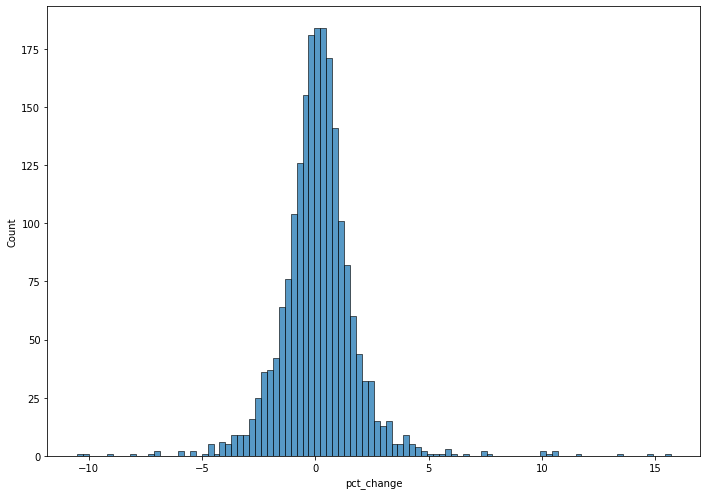

In [334]:
company = 'LLY'
pct_change_vals = close_price_day_change_df[close_price_day_change_df['company'] == company]['pct_change']
sns.histplot(pct_change_vals,bins=100)

In [335]:
print(np.mean(pct_change_vals))
print(np.std(pct_change_vals))
print(np.var(pct_change_vals))

0.12309137218148566
1.7431183711493687
3.0384616558384283


In [336]:
company_comp_df = close_price_day_change_df[['company','pct_change']].groupby(by='company').agg({'pct_change':['mean','std']})

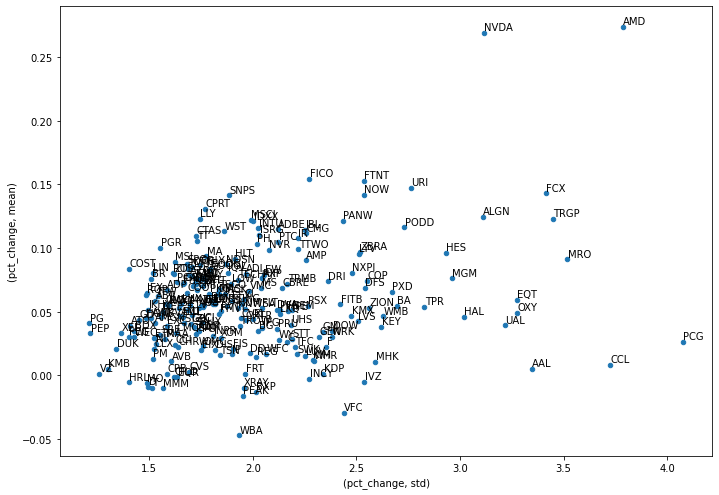

In [337]:
company_comp_df.plot.scatter(x=('pct_change','std'),y=('pct_change','mean'))
for i in company_comp_df.index:
    plt.annotate(i, xy= (company_comp_df.loc[i,('pct_change','std')]+2e-3, company_comp_df.loc[i,('pct_change','mean')]+2e-3))

### Correlation + Covariance

In [273]:
close_price_day_comp_df = close_price_day_change_df[['Date','company','pct_change']].pivot(index='Date',columns='company',values='pct_change')

#### Covariance

In [274]:
close_price_day_comp_df.cov()

company      AAPL       AIG      AMZN      GOOG       LLY      MSFT       NVO  \
company                                                                         
AAPL     3.014175  1.008689  2.443367  2.272739  0.714484  2.162324  0.756716   
AIG      1.008689  3.351181  1.038685  1.053460  0.438566  0.828030  0.500940   
AMZN     2.443367  1.038685  5.487812  3.089840  0.677975  2.724988  0.544002   
GOOG     2.272739  1.053460  3.089840  3.947662  0.689392  2.503750  0.784162   
LLY      0.714484  0.438566  0.677975  0.689392  3.366912  0.800122  1.590621   
MSFT     2.162324  0.828030  2.724988  2.503750  0.800122  3.013803  0.787358   
NVO      0.756716  0.500940  0.544002  0.784162  1.590621  0.787358  3.397453   
SPY      1.526035  1.153816  1.825912  1.617739  0.617023  1.496155  0.640253   
TSLA     3.417179  1.502628  3.915042  3.015783  0.390397  2.836953  0.967677   

company       SPY       TSLA  
company                       
AAPL     1.526035   3.417179  
AIG      1.153816   1.502628  
AMZN     1.825912   3.915042  
GOOG     1.617739   3.015783  
LLY      0.617023   0.390397  
MSFT     1.496155   2.836953  
NVO      0.640253   0.967677  
SPY      1.210191   2.238796  
TSLA     2.238796  13.565039

#### Correlation

In [275]:
close_price_day_comp_df.corr()

company      AAPL       AIG      AMZN      GOOG       LLY      MSFT       NVO  \
company                                                                         
AAPL     1.000000  0.317376  0.600765  0.658863  0.224281  0.717429  0.236468   
AIG      0.317376  1.000000  0.242206  0.289634  0.130563  0.260549  0.148460   
AMZN     0.600765  0.242206  1.000000  0.663845  0.157724  0.670051  0.125986   
GOOG     0.658863  0.289634  0.663845  1.000000  0.189095  0.725878  0.214121   
LLY      0.224281  0.130563  0.157724  0.189095  1.000000  0.251179  0.470299   
MSFT     0.717429  0.260549  0.670051  0.725878  0.251179  1.000000  0.246058   
NVO      0.236468  0.148460  0.125986  0.214121  0.470299  0.246058  1.000000   
SPY      0.799012  0.572942  0.708522  0.740136  0.305674  0.783416  0.315753   
TSLA     0.534408  0.222865  0.453760  0.412116  0.057767  0.443695  0.142542   

company       SPY      TSLA  
company                      
AAPL     0.799012  0.534408  
AIG      0.572942  0.222865  
AMZN     0.708522  0.453760  
GOOG     0.740136  0.412116  
LLY      0.305674  0.057767  
MSFT     0.783416  0.443695  
NVO      0.315753  0.142542  
SPY      1.000000  0.552557  
TSLA     0.552557  1.000000

<Axes: xlabel='company', ylabel='company'>

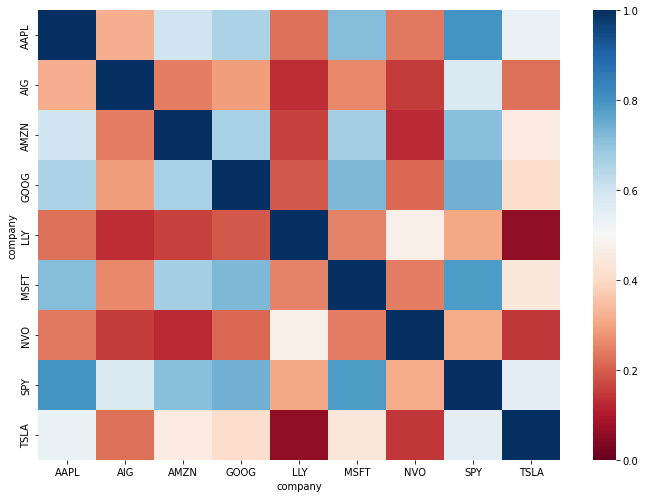

In [276]:
sns.heatmap(close_price_day_comp_df.corr(),cmap = 'RdBu',vmin = 0, vmax = 1)

## Simple returns and log returns

In [277]:
# Simple returns can be misleading
# Log returns is muchhhh more accurate

In [278]:
stocks_df[['Close','company']]

Close company
Date                          
2021-01-04   37.130001     AIG
2021-01-05   37.750000     AIG
2021-01-06   40.209999     AIG
2021-01-07   40.889999     AIG
2021-01-08   40.619999     AIG
...                ...     ...
2024-02-08  735.679993     LLY
2024-02-09  740.159973     LLY
2024-02-12  737.260010     LLY
2024-02-13  742.969971     LLY
2024-02-14  753.711792     LLY

[7056 rows x 2 columns]

In [279]:
# Forward fill fillna(method = 'ffill')
# Backward fill fillna(method = 'bfill')

## Cumulative Returns + Drawdowns

In [280]:
# Cumulative Max (cummax)
# Cumulative Sum (cumsum)
len(companies)

8

3
MSFT
2022-11-03 00:00:00


AMZN
2022-12-28 00:00:00


LLY
2021-09-28 00:00:00


NVO
2022-09-26 00:00:00


AIG
2023-03-23 00:00:00


TSLA
2023-01-03 00:00:00


GOOG
2022-11-03 00:00:00


SPY
2022-10-12 00:00:00


AAPL
2023-01-05 00:00:00




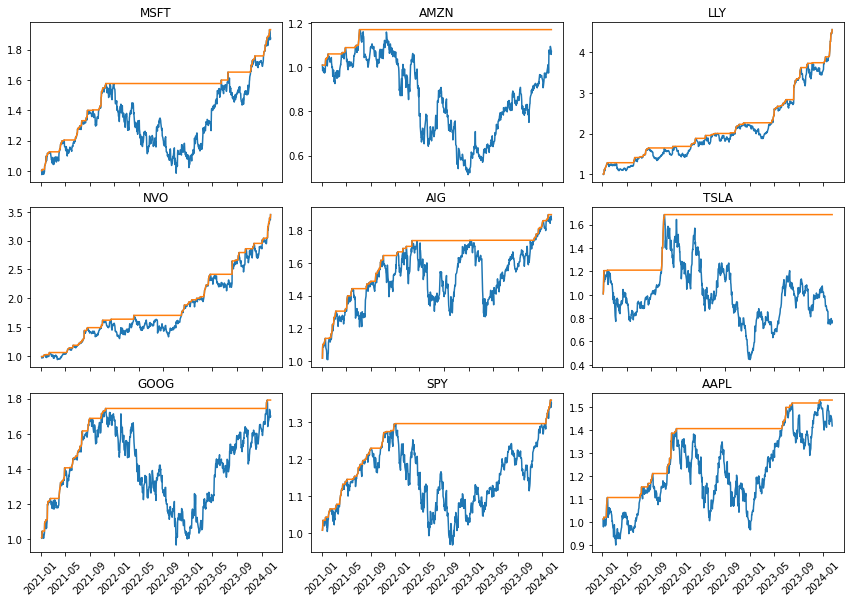

<Figure size 5760x5760 with 0 Axes>

In [281]:
companies = list(set(stocks_df['company']))
size = int(np.sqrt(len(companies)))
print(size)
fig, axs = plt.subplots(size,size,sharex=True,layout='constrained')
plt.figure(figsize=(80,80))
for i in range(len(companies)):
    x = i // size
    y = i % size
    company = companies[i]
    returns_df = stocks_df[stocks_df['company']==company][['Close']]
    returns_df['d_returns'] = np.log(returns_df[['Close']].div(returns_df[['Close']].shift(1)))
    returns_df['cum_returns'] = returns_df.d_returns.cumsum().apply(np.exp)
    returns_df['cum_max'] = returns_df.cum_returns.cummax()
    returns_df['Drawdown_Percentage'] = (returns_df['cum_max'] - returns_df['cum_returns']) / returns_df['cum_max']
    print(company)
    print(returns_df.Drawdown_Percentage.idxmax())
    print('\n')
    axs[x,y].plot(returns_df[['cum_returns','cum_max']])
    axs[x,y].tick_params(axis='x', rotation=45)
    axs[x,y].title.set_text(str(company)) 


## Backtesting

In [282]:
RTX_df = stocks_df[stocks_df['company']=='TSLA'][['Close']]

In [283]:
# Moving average [mean + median]
num_days = 50
RTX_roll = RTX_df.rolling(window=num_days)
RTX_roll_mean = RTX_roll.mean()
RTX_roll_median = RTX_roll.median()

<Axes: xlabel='Date'>

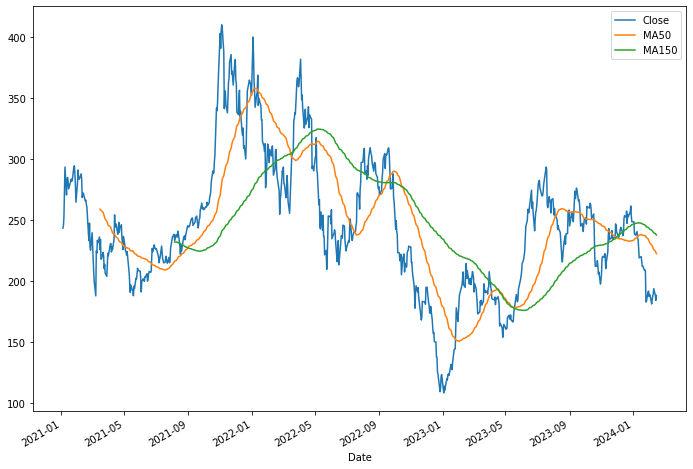

In [284]:
RTX_df['MA50'] = RTX_df[['Close']].rolling(window=num_days).mean()
RTX_df['MA150'] = RTX_df[['Close']].rolling(window=num_days*3).mean()

RTX_df.plot()

<Axes: xlabel='Date'>

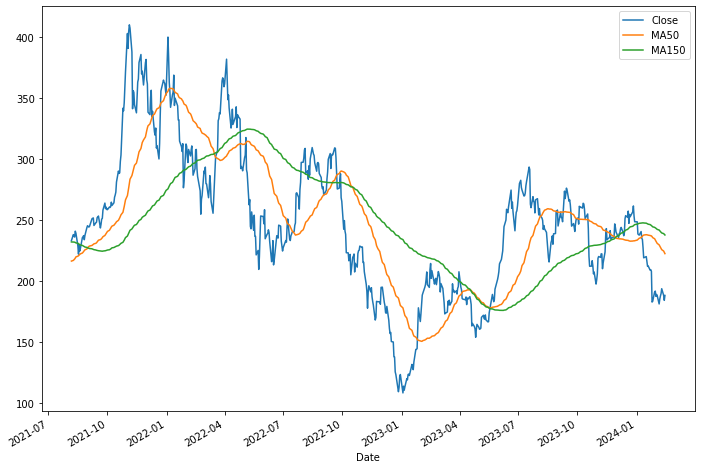

In [285]:
RTX_df.dropna(inplace=True)
RTX_df.plot()

In [286]:
# Short bias
RTX_df['position_short'] = np.where(RTX_df['MA50'] < RTX_df['MA150'],1,-1)

# Long bias
RTX_df['position_long'] = np.where(RTX_df['MA50'] > RTX_df['MA150'],1,-1)

<Axes: xlabel='Date'>

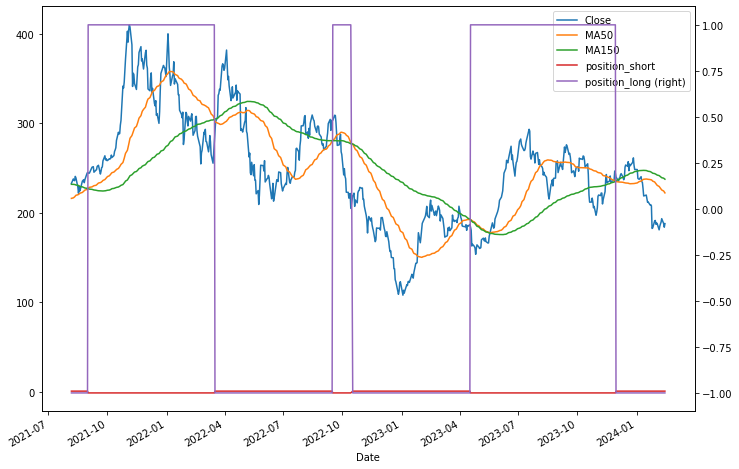

In [287]:
RTX_df.plot(secondary_y='position_long')

In [288]:
RTX_df['returnsb&h'] = np.log(RTX_df[['Close']].div(RTX_df[['Close']].shift(1)))
RTX_df['strategy_long'] = RTX_df['returnsb&h'] * RTX_df['position_long'].shift(1)
RTX_df['strategy_short'] = RTX_df['returnsb&h'] * RTX_df['position_short'].shift(1)

### Compare

In [289]:
print(RTX_df[['returnsb&h','strategy_long','strategy_short']].sum())
print(RTX_df[['returnsb&h','strategy_long','strategy_short']].std()*np.sqrt(252))

returnsb&h       -0.214527
strategy_long     0.438194
strategy_short   -0.438194
dtype: float64
returnsb&h        0.590473
strategy_long     0.590395
strategy_short    0.590395
dtype: float64


In [290]:
RTX_df[['returnsb&h','strategy_long','strategy_short']].sum().apply(np.exp) # What 1 dollar is worth

returnsb&h        0.806923
strategy_long     1.549905
strategy_short    0.645201
dtype: float64

## Function

In [291]:
def test_strategy(stock,SMA):
    df = stocks_df[stocks_df['company'] == stock]
    RTX_df= df.Close.to_frame()
    RTX_df['SMA_S'] = RTX_df[['Close']].rolling(window=int(SMA[0])).mean()
    RTX_df['SMA_L'] = RTX_df[['Close']].rolling(window=int(SMA[1])).mean()
    RTX_df['returnsb&h'] = np.log(RTX_df[['Close']].div(RTX_df[['Close']].shift(1)))
    RTX_df.dropna(inplace=True)
    # Short bias
    RTX_df['position_short'] = np.where(RTX_df['SMA_S'] < RTX_df['SMA_L'],1,-1)

    # Long bias
    RTX_df['position_long'] = np.where(RTX_df['SMA_S'] > RTX_df['SMA_L'],1,-1)
    
    RTX_df['strategy_long'] = RTX_df['returnsb&h'] * RTX_df['position_long'].shift(1)
    RTX_df['strategy_short'] = RTX_df['returnsb&h'] * RTX_df['position_short'].shift(1)
    
    long_returns = np.exp(RTX_df['strategy_long'].sum())
    long_std = RTX_df['strategy_long'].std() * np.sqrt(252)
    
    short_returns = np.exp(RTX_df['strategy_short'].sum())
    short_std = RTX_df['strategy_short'].std() * np.sqrt(252)
    
    return (long_returns, long_std), (short_returns,short_std)

In [292]:
test_strategy("SPY",(50,200))

((1.1149084830487104, 0.18802741859381933),
 (0.896934605130554, 0.18802741859381933))

In [293]:
class SMA_Backtester():
    def __init__(self, stock, SMA_S, SMA_L):
        self.stock = stock
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.results = None
        self.get_data()
        
    def get_data(self):
        df = stocks_df[stocks_df['company'] == self.stock]
        RTX_df= df.Close.to_frame()
        RTX_df['SMA_S'] = RTX_df[['Close']].rolling(window=int(self.SMA_S)).mean()
        RTX_df['SMA_L'] = RTX_df[['Close']].rolling(window=int(self.SMA_L)).mean()
        RTX_df['returns'] = np.log(RTX_df[['Close']].div(RTX_df[['Close']].shift(1)))
        RTX_df.dropna(inplace=True)
        self.data2 = RTX_df
        return RTX_df
    
    def test_results(self):
        # Short bias
        data = self.data2.copy().dropna()
        data['position_short'] = np.where(data['SMA_S'] < data['SMA_L'],1,-1)

        # Long bias
        data['position_long'] = np.where(data['SMA_S'] > data['SMA_L'],1,-1)

        data['strategy_long'] = data['returns'] * data['position_long'].shift(1)
        data['strategy_short'] = data['returns'] * data['position_short'].shift(1)
        
        data['returnsbh'] = data['returns'].cumsum().apply(np.exp)
        data['return_strategy_long'] = data['strategy_long'].cumsum().apply(np.exp)
        data['return_strategy_short'] = data['strategy_short'].cumsum().apply(np.exp)
        
        short_perf = data['return_strategy_short'].iloc[-1]
        long_perf = data['return_strategy_long'].iloc[-1]
        
        short_outperf = short_perf - data['returnsbh'].iloc[-1]
        long_outperf = long_perf - data['returnsbh'].iloc[-1]
        self.results = data
        
        #         long_returns = np.exp(data['strategy_long'].sum())
        #         long_std = data['strategy_long'].std() * np.sqrt(252)

        #         short_returns = np.exp(data['strategy_short'].sum())
        #         short_std = data['strategy_short'].std() * np.sqrt(252)
        return (round(short_perf,4),round(short_outperf,4)), (round(long_perf,4),round(long_outperf,4))
    
    def plot_results(self):
        if self.results is None:
            print("Run the Test")
        else:
            title = "{}| SMA_S={} | SMA_L={}".format(self.stock, self.SMA_S, self.SMA_L)
            self.results[['returnsbh','return_strategy_short','return_strategy_long']].plot(title = title, figsize = (20,15))



In [294]:
x = SMA_Backtester('NVO',50,200)

In [295]:
x.test_results()

((0.696, -1.7126), (1.4367, -0.9719))

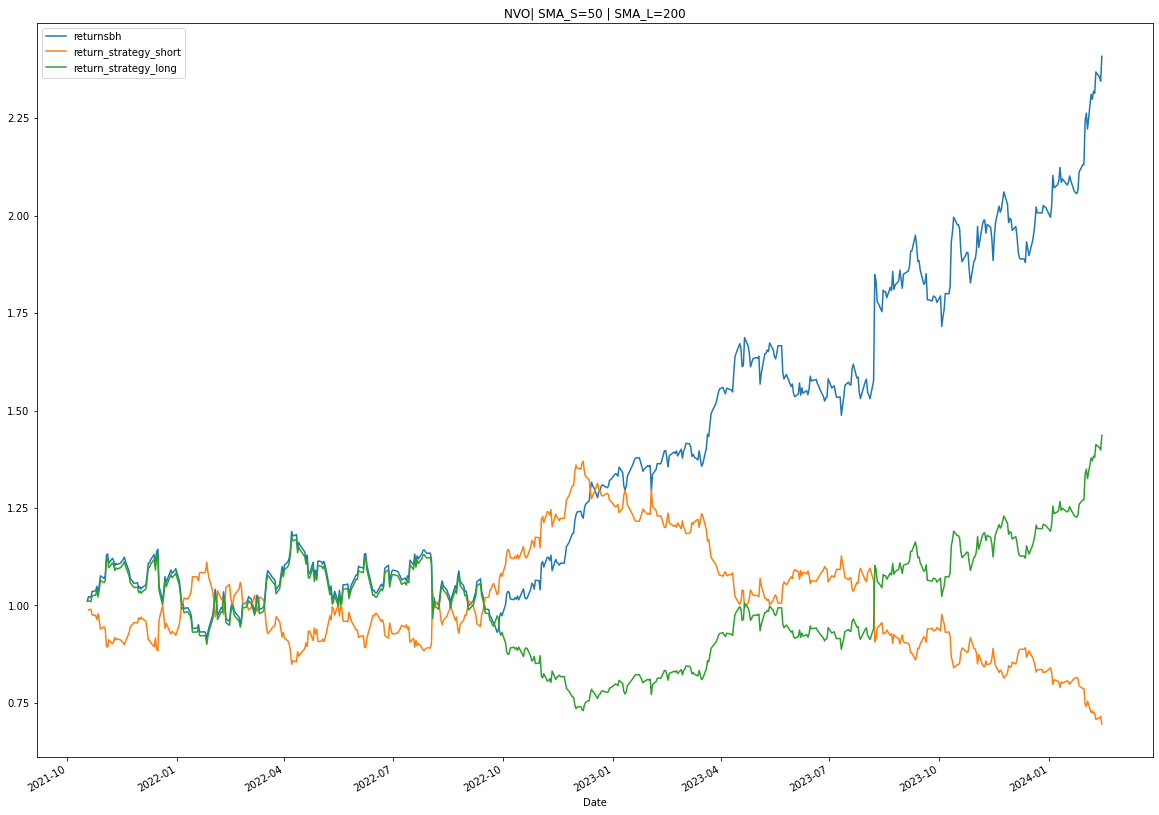

In [296]:
x.plot_results()

## API

In [297]:
# !pip install alpha_vantage

In [298]:
from alpha_vantage.timeseries import TimeSeries

In [299]:
API_key = 'ZXQLHOI678WR78YB'

In [300]:
ts = TimeSeries(key=API_key,output_format='pandas')

In [301]:
data = ts.get_weekly('AAPL')
data[0]

1. open  2. high    3. low  4. close    5. volume
date                                                         
2024-02-13  188.415   188.67  183.5128    185.04   98311463.0
2024-02-09  188.150   191.05  185.8400    188.85  252715796.0
2024-02-02  192.010   192.20  179.2500    185.85  325909883.0
2024-01-26  192.300   196.38  191.9400    192.42  255368848.0
2024-01-19  182.160   191.95  180.3000    191.56  259829213.0
...             ...      ...       ...       ...          ...
1999-12-10  114.560   118.00   99.0000    103.00   25152800.0
1999-12-03   94.250   115.56   93.2500    115.00   28046300.0
1999-11-26   91.750    95.50   88.5000     95.06    9757600.0
1999-11-19   89.620    94.75   88.0600     92.44   13711000.0
1999-11-12   87.750    97.73   86.7500     90.62   25776200.0

[1267 rows x 5 columns]

## Weinstein Trading Strategy

In [302]:
stocks_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04   37.650002   37.950001   36.820000   37.130001   34.561192   
2021-01-05   37.279999   38.009998   37.180000   37.750000   35.138302   
2021-01-06   38.619999   40.660000   38.619999   40.209999   37.428104   
2021-01-07   40.779999   41.040001   40.349998   40.889999   38.061058   
2021-01-08   41.000000   41.119999   40.009998   40.619999   37.809738   
...                ...         ...         ...         ...         ...   
2024-02-08  728.320007  741.000000  725.750000  735.679993  735.679993   
2024-02-09  735.500000  745.700012  733.609985  740.159973  740.159973   
2024-02-12  740.799988  740.799988  726.450012  737.260010  737.260010   
2024-02-13  730.179993  742.979980  730.179993  742.969971  742.969971   
2024-02-14  745.820007  764.049988  745.330017  753.711792  753.711792   

             Volume company  
Date                         
2021-01-04  7081000     AIG  
2021-01-05  4268000     AIG  
2021-01-06  8198600     AIG  
2021-01-07  5109700     AIG  
2021-01-08  5344800     AIG  
...             ...     ...  
2024-02-08  4636900     LLY  
2024-02-09  2830700     LLY  
2024-02-12  2932300     LLY  
2024-02-13  2860300     LLY  
2024-02-14  2448478     LLY  

[7056 rows x 7 columns]

C:\Users\ynakadi\AppData\Local\Temp/ipykernel_4356/3657186747.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ynakadi\AppData\Local\Temp/ipykernel_4356/3657186747.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-08-06  136.294998  137.080048  136.046494  137.035995  137.035995   
2021-08-09  136.949005  138.321503  136.428757  138.001999  138.001999   
2021-08-10  138.079498  138.551498  137.226501  138.096497  138.096497   
2021-08-11  138.283005  138.847748  137.350006  137.689499  137.689499   
2021-08-12  137.712997  138.417999  136.779007  138.389496  138.389496   
...                ...         ...         ...         ...         ...   
2024-02-08  146.970001  147.610001  146.419998  147.220001  147.220001   
2024-02-09  147.949997  150.695007  147.429993  150.220001  150.220001   
2024-02-12  149.539993  150.589996  148.559998  148.729996  148.729996   
2024-02-13  146.070007  148.039993  145.110001  146.369995  146.369995   
2024-02-14  147.369995  147.830002  145.554993  146.910004  146.910004   

              Volume company       SMA_S  
Date                                      
2021-08-06  13560000    GOOG  113.477250  
2021-08-09  12374000    GOOG  113.821183  
2021-08-10  16034000    GOOG  114.161520  
2021-08-11  15204000    GOOG  114.501020  
2021-08-12  14646000    GOOG  114.827867  
...              ...     ...         ...  
2024-02-08  18241300    GOOG  135.332800  
2024-02-09  21864000    GOOG  135.533333  
2024-02-12  17236100    GOOG  135.745733  
2024-02-13  18138500    GOOG  135.936800  
2024-02-14  10830420    GOOG  136.118733  

[635 rows x 8 columns]

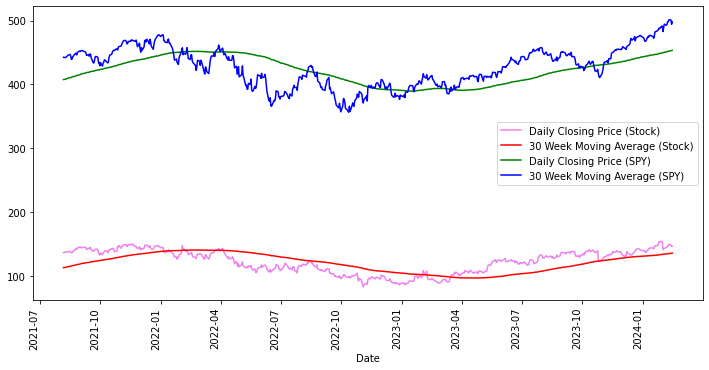

In [307]:
df = stocks_df[stocks_df['company'] == 'GOOG']
spy_df = stocks_df[stocks_df['company'] == 'SPY']
df['SMA_S'] = df[['Close']].rolling(window=30*5).mean()
spy_df['SMA_S'] = spy_df[['Close']].rolling(window=30*5).mean()

df = df.dropna()#.reset_index()
spy_df = spy_df.dropna()#.reset_index()

# df['date_str'] = df['Date'].apply(lambda x: str(x))
# spy_df['date_str'] = spy_df['Date'].apply(lambda x: str(x))

fig, ax1 = plt.subplots(figsize=(12,6))
df[['Close']].plot(label='Daily Closing Price (Stock)',ax=ax1,color = 'violet')
df[['SMA_S']].plot(label='30 Week Moving Average (Stock)',ax=ax1,color = 'red')
spy_df[['SMA_S']].plot(label='30 Week Moving Average (SPY)',ax=ax1,color = 'green')
spy_df[['Close']].plot(label='Daily Closing Price (SPY)',ax=ax1,color = 'blue')

# sns.lineplot(spy_df, x="date_str", y="Close",label='Daily Closing Price (SPY)',ax=ax1,color = 'red')
# sns.lineplot(spy_df, x="date_str", y="SMA_S",label='30 Week Moving Average (SPY)', ax=ax1,color = 'green')
plt.legend(['Daily Closing Price (Stock)','30 Week Moving Average (Stock)', 'Daily Closing Price (SPY)','30 Week Moving Average (SPY)'])
plt.xticks(rotation=90)
# ax2 = ax1.twinx()

# sns.barplot(df, x="date_str", y="Volume",ax=ax2,color='mediumblue')



# ax2.set_ylabel("Share Price",color='mediumblue')
df

<Axes: xlabel='Date', ylabel='SMA_S'>

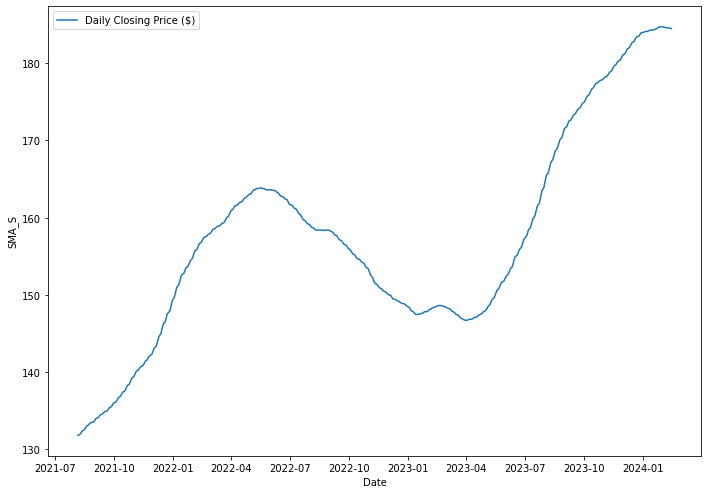

In [233]:
sns.lineplot(df, x="Date", y="SMA_S",label='Daily Closing Price ($)')